In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from scipy import stats

In [ ]:
df = pd.read_csv("ethereum_daily_data_2018_2024.csv")
df.head()

,time,Open,High,Low,Close,Volume
0,2018-01-01,741.69,766.49,718.90,757.22,910875.63
1,2018-01-02,756.17,882.61,756.17,861.97,1123318.86
2,2018-01-03,861.97,951.70,847.90,941.10,871172.13
3,2018-01-04,941.00,997.44,901.03,944.83,822844.78
4,2018-01-05,944.50,1165.81,926.75,963.88,1682729.53


In [ ]:
df.Close.plot()

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns

stats_summary = pd.DataFrame({
    'mean': df[num_cols].mean(),
    'variance': df[num_cols].var(),
    'std_dev': df[num_cols].std(),
    'median': df[num_cols].median(),
    'min': df[num_cols].min(),
    'max': df[num_cols].max(),
    'missing': df[num_cols].isna().sum()
})
print("\n=== STATISTICHE DESCRITTIVE ===")
print(stats_summary)


=== STATISTICHE DESCRITTIVE ===
                mean      variance       std_dev      median       min  \
Open    1.448708e+03  1.465906e+06  1.210746e+03    1319.290     84.12   
High    1.489955e+03  1.548302e+06  1.244308e+03    1353.285     84.53   
Low     1.402849e+03  1.373834e+06  1.172107e+03    1271.875     82.08   
Close   1.449480e+03  1.466272e+06  1.210897e+03    1320.270     84.12   
Volume  1.003126e+06  1.241976e+12  1.114440e+06  524569.395  29811.67   

                max  missing  
Open        4810.97        0  
High        4865.94        0  
Low         4710.00        0  
Close       4810.97        0  
Volume  10980332.09        0  


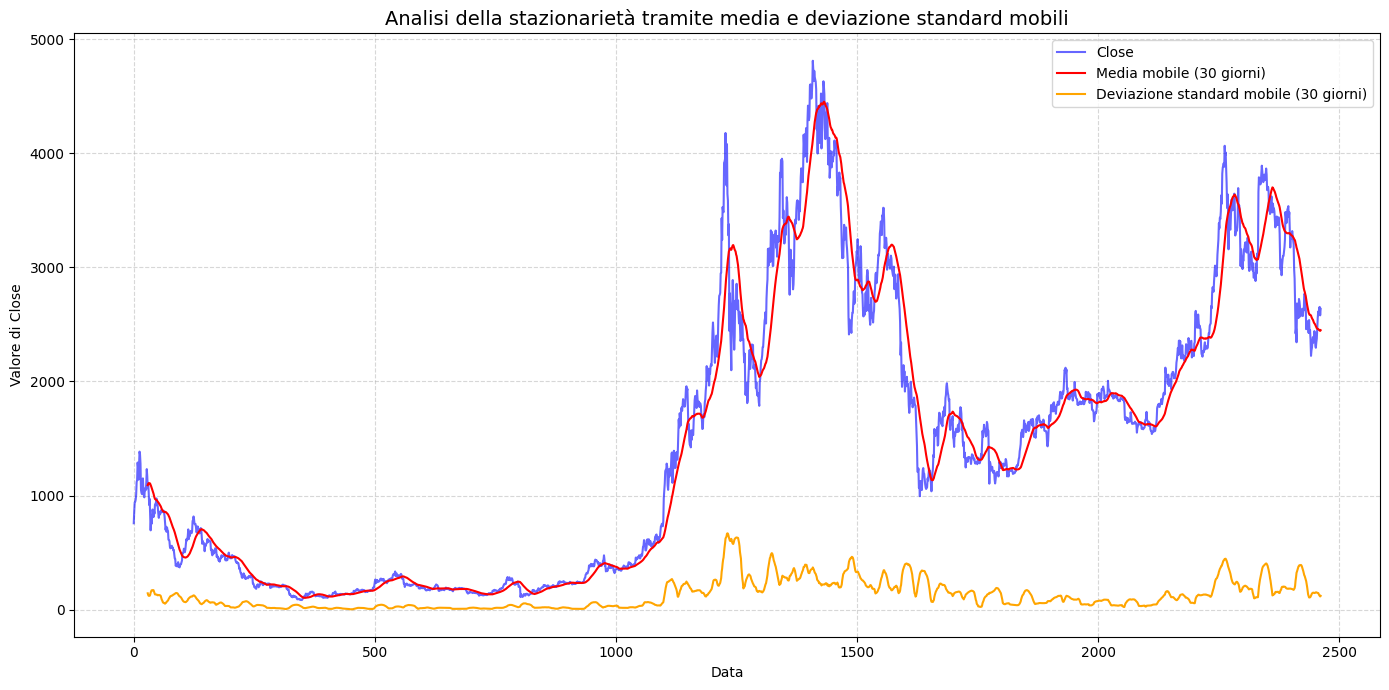

In [ ]:
# Parametro della finestra mobile (ad esempio 30 giorni)
window = 30

# Calcolo della media e deviazione standard mobili
rolling_mean = df['Close'].rolling(window=window).mean()
rolling_std = df['Close'].rolling(window=window).std()

# === GRAFICO ===
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], color='blue', label='Close', alpha=0.6)
plt.plot(rolling_mean, color='red', label=f'Media mobile ({window} giorni)')
plt.plot(rolling_std, color='orange', label=f'Deviazione standard mobile ({window} giorni)')
plt.title('Analisi della stazionarietà tramite media e deviazione standard mobili', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Valore di Close')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

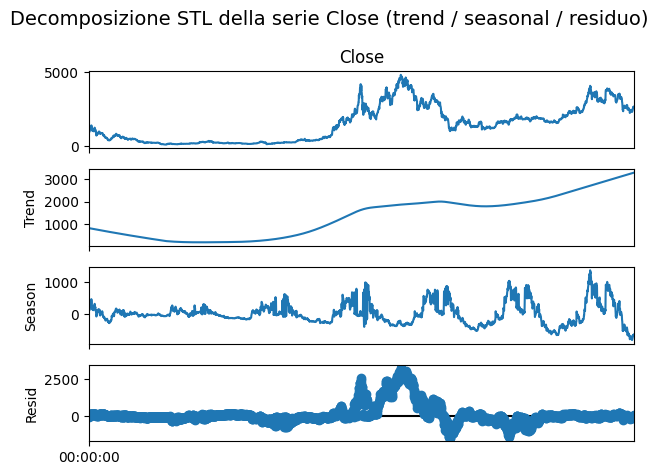

<Figure size 1000x200 with 0 Axes>

In [ ]:
df.index = pd.to_datetime(df.index)

df['Close'] = df['Close'].ffill()

period = 365

stl = STL(df['Close'], period=period, robust=True)
res = stl.fit()

fig = res.plot()
fig.suptitle('Decomposizione STL della serie Close (trend / seasonal / residuo)', fontsize=14)
plt.tight_layout()
plt.figure(figsize=(10, 2))
plt.show()